In [8]:
# Importing all the libraries
!pip install folium
!pip install geopy
!pip install ipython

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import sqlite3
import folium
from geopy.geocoders import nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Creating Database Connection

conn = sqlite3.connect('store_dataset_new_2.db')

In [12]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master where type = 'table'", conn)
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [13]:
# Dig into what all is there in the Tables

for table in tables['name']:
  display(pd.read_sql_query(f"SELECT * FROM {table} limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [15]:
# Data Analysis from here

In [16]:
# 1. Calculating the number of businesses from business table
pd.read_sql_query("SELECT COUNT(*) FROM business", conn)

,COUNT(*)
0,150346


In [43]:
# 2. Calculating how many of the businesses are of Restraunts and how many of them are open till date
business_id = pd.read_sql_query("""SELECT business_id, review_count FROM business WHERE lower(categories) LIKE '%Restaurants%' AND is_open = 1""", conn)
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34982,w_4xUt-1AyY2ZwKtnjW0Xg,998
34983,l9eLGG9ZKpLJzboZq-9LRQ,11
34984,cM6V90ExQD6KMSU3rRB5ZA,33
34985,WnT9NIzQgLlILjPT0kEcsQ,35


In [36]:
# 3. Calculate the business score of a business by calculating the review count and star rating of that particular business
# To calculate these values, we'll require min, max, avg and median

pd.read_sql_query(f"""SELECT
    AVG(review_count) AS avg_review_count,
    MIN(review_count) AS min_review_count,
    MAX(review_count) AS max_review_count,
    (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) as MEDIAN_review_count,
              
    AVG(stars) AS avg_star_rating,
    MIN(stars) AS min_star_rating,
    MAX(stars) AS max_star_rating,
    (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) as MEDIAN_star_rating        
              
    FROM business
    WHERE business_id IN {tuple(business_id['business_id'])};
    
    """, conn).transpose()

,0
avg_review_count,104.142767
min_review_count,5.000000
max_review_count,7568.000000
MEDIAN_review_count,15.000000
avg_star_rating,3.523895
min_star_rating,1.000000
max_star_rating,5.000000
MEDIAN_star_rating,3.500000


In [41]:
# Noticing the Max(review_count) and MEDIAN_review_count, it clearly states that there are some 
# specific of the businesses that have highter review count becuase of which we see this outliers.

# So to remove the outlier we create a function.
# For this we'll use quantile function.

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [44]:
business_id = remove_outliers(business_id, 'review_count')

In [45]:
business_id.shape

(31520, 2)

In [46]:
# Again comparing the values to check if the outlier is now reduced

pd.read_sql_query(f"""SELECT
    AVG(review_count) AS avg_review_count,
    MIN(review_count) AS min_review_count,
    MAX(review_count) AS max_review_count,
    (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) as MEDIAN_review_count,
              
    AVG(stars) AS avg_star_rating,
    MIN(stars) AS min_star_rating,
    MAX(stars) AS max_star_rating,
    (SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) as MEDIAN_star_rating        
              
    FROM business
    WHERE business_id IN {tuple(business_id['business_id'])};
    
    """, conn).transpose()

,0
avg_review_count,55.999397
min_review_count,5.000000
max_review_count,248.000000
MEDIAN_review_count,15.000000
avg_star_rating,3.477173
min_star_rating,1.000000
max_star_rating,5.000000
MEDIAN_star_rating,3.500000


In [49]:
# Which resturants have the highest number of reviews?

pd.read_sql_query(f"""SELECT name, SUM(review_count) AS review_count, AVG(stars) AS avg_rating
                     FROM business
                     WHERE business_id IN {tuple(business_id['business_id'])}
                     GROUP BY name
                     ORDER BY review_count DESC 
                     LIMIT 10
                     """, conn)


,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [50]:
# Which resturants have the highest number of ratings?

pd.read_sql_query(f"""SELECT name, SUM(review_count) AS review_count, AVG(stars) AS avg_rating
                     FROM business
                     WHERE business_id IN {tuple(business_id['business_id'])}
                     GROUP BY name
                     ORDER BY avg_rating DESC 
                     LIMIT 10
                     """, conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [51]:
# From the above two tables study, it shows that it is not necessay that the rating could be good if the reviews are good or viceversa.

In [52]:
# Do restaurants with higher engagement tend to have higher ratings?

pd.read_sql_query(f"""SELECT business_id,
                      SUM(length(date) - length(replace(date,',',''))+1) as checkin_count
                      FROM checkin
                      GROUP BY business_id
                     """, conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [54]:
pd.read_sql_query(f"""SELECT business_id,
                      count(*) as tip_count
                      FROM tip
                      GROUP BY business_id
                     """, conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [57]:
# Combining all the queries together to yeild the averages as per ratings for businesses


review_count_df = pd.read_sql_query(f"""SELECT total.avg_rating as rating,
                      AVG(total.review_count) AS avg_review_count,
                      AVG(total.checkin_count) AS avg_checkin_count,
                      AVG(total.tip_count) AS avg_tip_count
                      FROM
                        (SELECT
                            b.business_id,
                            SUM(b.review_count) AS review_count,
                            AVG(b.stars) AS avg_rating,
                            SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',','')) +1) AS checkin_count,
                            SUM(tip.tip_count) AS tip_count
                        FROM
                            business b
                        LEFT JOIN
                        checkin cc 
                        ON b.business_id = cc.business_id
                        LEFT JOIN
                            (SELECT business_id,
                                    count(business_id) as tip_count
                             FROM tip
                             GROUP BY business_id
                             ORDER BY tip_count
                            ) AS tip
                            ON b.business_id = tip.business_id
                        WHERE b.business_id IN {tuple(business_id['business_id'])}
                        GROUP BY
                            b.business_id) AS total

                        GROUP BY total.avg_rating
                        """, conn)

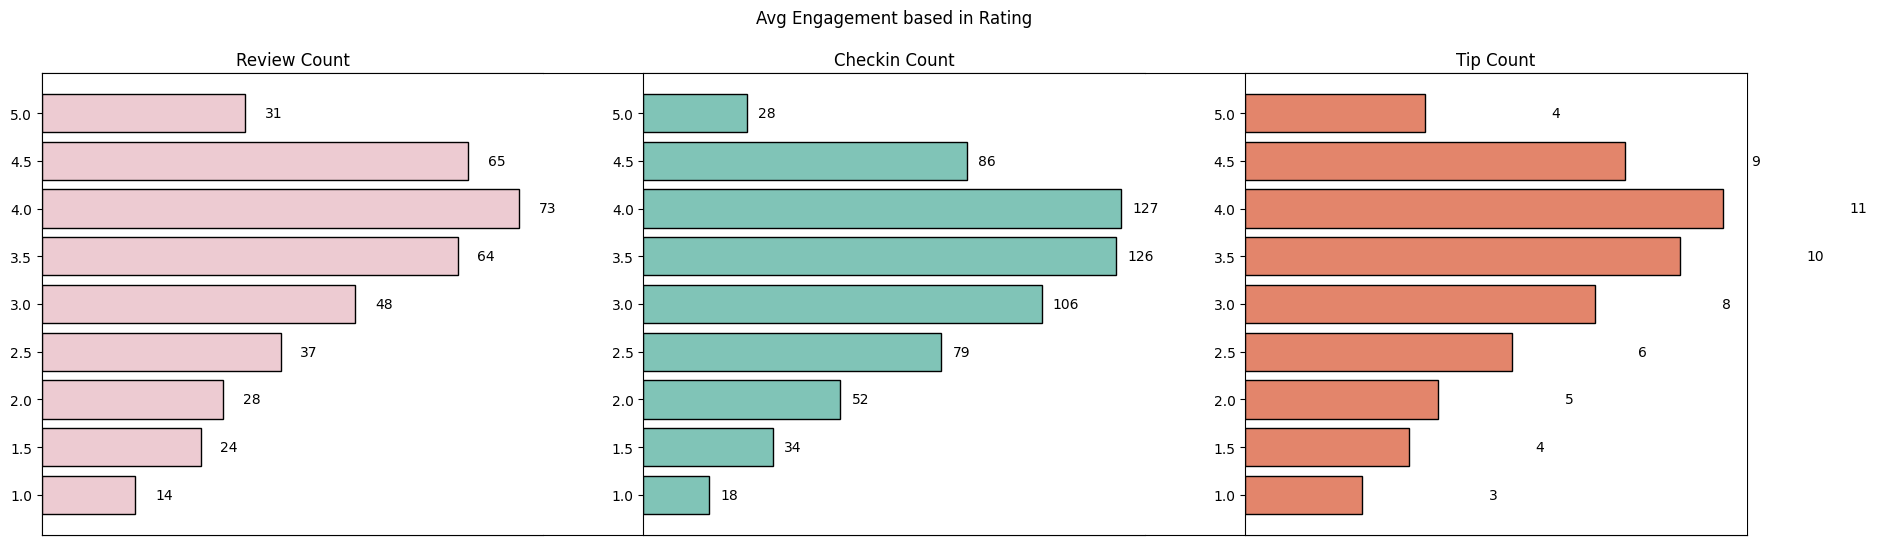

In [71]:
plt.figure(figsize=(22,6))
plt.title('Avg Engagement based in Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor = 'k', color = '#EDCBD2')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')
    

plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#80C4B7')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')
    
    
plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor = 'k', color = '#E3856B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')
    
plt.xticks([])
plt.show()


In [ ]:
# From the above plots we understand that, any business goes on increasing till 4+ rating, after that it goes on decreasing, 
# which means for any business to capture market it has to attain atleast 4+ rating

In [92]:
# Is there any relation between the Reviews, Check-ins and Tips for a business?

engagnement_df = pd.read_sql_query(f"""SELECT
                    b.business_id,
                    SUM(b.review_count) AS review_count,
                    AVG(b.stars) AS avg_rating,
                    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',','')) +1) AS checkin_count,
                    SUM(tip.tip_count) AS tip_count,
                    (CASE WHEN b.stars >= 3.5 THEN 'High-rated' ELSE 'Low-rated' END) AS category
                        FROM
                            business b
                        LEFT JOIN
                        checkin cc 
                        ON b.business_id = cc.business_id
                        LEFT JOIN
                            (SELECT business_id,
                                    count(business_id) as tip_count
                             FROM tip
                             GROUP BY business_id
                             ORDER BY tip_count
                            ) AS tip
                            ON b.business_id = tip.business_id
                        WHERE b.business_id IN {tuple(business_id['business_id'])}
                        GROUP BY
                            b.business_id
                        """, conn).dropna()                            # dropna() is used here to remove all the nulls and NaNs

In [93]:
engagnement_df[['review_count', 'checkin_count', 'tip_count']]

,review_count,checkin_count,tip_count
0,24,11.0,4.0
1,14,10.0,6.0
2,34,118.0,6.0
4,15,21.0,2.0
5,135,500.0,25.0
...,...,...,...
31513,19,6.0,5.0
31515,86,292.0,17.0
31516,6,20.0,2.0
31517,47,27.0,2.0


In [94]:
engagnement_df[['review_count', 'checkin_count', 'tip_count']].corr()  #Finding the correlation amongst the three

,review_count,checkin_count,tip_count
review_count,1.000000,0.626837,0.766273
checkin_count,0.626837,1.000000,0.772061
tip_count,0.766273,0.772061,1.000000


<Axes: >

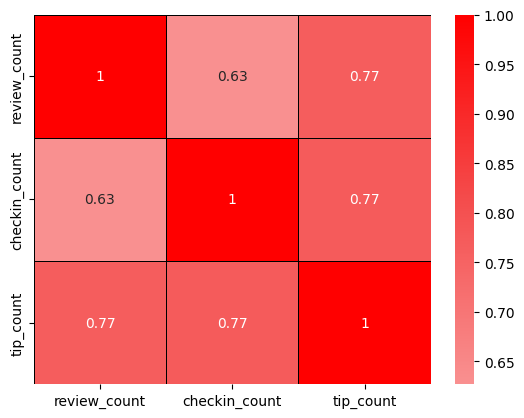

In [95]:
# Plotting a Heat-map for the correlations

colors = ['#f99090','#f44c4c','#ff0000']
custom_cmap = LinearSegmentedColormap.from_list("mycamp", colors)
sns.heatmap(engagnement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidth = 0.5, linecolor = 'black')

In [97]:
# Is there any difference in the User-engagement (Reviews, Check-ins and Tips) between a High-rated and Low-rated business?
# considering a business if has rating of 3.5+ then it will be a High-rated business, else a Low-rated business.

engagnement_df.groupby("category")[['review_count', 'checkin_count', 'tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
High-rated,72.319991,122.106865,10.166411
Low-rated,42.132915,88.905759,6.543136


In [156]:
# To calculate Success Metric.

# Function to calculate the sucess score based on the average rating and total review count

def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score    

In [113]:
# How do the success metric (review_count or avg_count) of restaurants vary across different states and cities

city_df = pd.read_sql_query(f"""SELECT city, state, latitude, longitude, AVG(stars) AS avg_rating, SUM(review_count) AS review_count, 
                     COUNT(*) AS restuarant_count
                     FROM business
                     WHERE business_id IN {tuple(business_id['business_id'])}
                     GROUP BY state, city
                     ORDER BY review_count DESC
                     LIMIT 10
                     """, conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [114]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restuarant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532011,175470,2999,42.649838
1,Tampa,FL,27.890814,-82.502346,3.571179,104368,1714,41.267425
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.385512,91562,1415,38.678743
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.692878,69233,1011,41.158043
6,Saint Louis,MO,38.583223,-90.407187,3.412963,51482,810,37.027259
7,Reno,NV,39.476518,-119.784037,3.478705,48340,587,37.521438
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558140,36087,559,37.338105


In [121]:
# Creating a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=6)

# Defining the colors for it
color_scale = folium.LinearColormap(colors=['#fb5607', '#8338ec', '#3a86ff'],
                                    vmin = city_df['success_score'].min(),
                                    vmax = city_df['success_score'].max())

# Adding markers on the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)
    
# Add color scale to the map
m.add_child(color_scale)

In [133]:
# Are there any patterns in user engagement over time for successful business compared to less successful ones?
# Are there any seasonal trends in the user engagement for the restaurants?

high_rated_engagement = pd.read_sql_query(f"""SELECT review_cal.month_year, 
                                                     review_cal.review_count, 
                                                     tip_cal.tip_count
                                              FROM
                                              (SELECT strftime('%m-%Y', date) AS month_year,
                                                      COUNT(*) AS review_count
                                               FROM review
                                               WHERE business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
                                               GROUP BY month_year
                                               ORDER BY month_year) AS review_cal
                                              JOIN 
                                               (SELECT AVG(b.stars),
                                                       strftime('%m-%Y', tip.date) AS month_year,
                                                       COUNT(*) AS tip_count
                                               FROM tip
                                               JOIN business as b
                                               ON tip.business_id = b.business_id
                                               WHERE tip.business_id IN {tuple(business_id['business_id'])} and stars >= 3.5
                                               GROUP BY month_year
                                               ORDER BY month_year) AS tip_cal

                                              ON review_cal.month_year = tip_cal.month_year;
                                              """, conn)



low_rated_engagement = pd.read_sql_query(f"""SELECT review_cal.month_year, 
                                                    review_cal.review_count, 
                                                    tip_cal.tip_count
                                              FROM
                                              (SELECT strftime('%m-%Y', date) AS month_year,
                                                      COUNT(*) AS review_count
                                               FROM review
                                               WHERE business_id IN {tuple(business_id['business_id'])} and stars < 3.5
                                               GROUP BY month_year
                                               ORDER BY month_year) AS review_cal
                                              JOIN 
                                               (SELECT AVG(b.stars),
                                                       strftime('%m-%Y', tip.date) AS month_year,
                                                       COUNT(*) AS tip_count
                                               FROM tip
                                               JOIN business as b
                                               ON tip.business_id = b.business_id
                                               WHERE tip.business_id IN {tuple(business_id['business_id'])} and stars < 3.5
                                               GROUP BY month_year
                                               ORDER BY month_year) AS tip_cal

                                              ON review_cal.month_year = tip_cal.month_year;
                                              """, conn)

In [134]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4971,1356
...,...,...,...
149,12-2017,10158,1477
150,12-2018,12870,1163
151,12-2019,13754,1161
152,12-2020,11293,937


In [135]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2768,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7590,275
152,12-2020,5013,148


In [139]:
time_rating = pd.read_sql_query(f"""SELECT strftime('%m-%Y', date) AS month_year,
                                           AVG(stars) AS avg_rating
                                    FROM review
                                    WHERE business_id IN {tuple(business_id['business_id'])}
                                    GROUP BY month_year
                                    ORDER BY month_year;
                                 """, conn)

In [140]:
# Sorting up the values for understanding

time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])       # Convereted to datetime format
time_rating.sort_values('month_year', inplace = True)                       # Sorted values
time_rating = time_rating[time_rating['month_year'] > '2017']               # Filtered values to show only 2017 and later

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])       # Convereted to datetime format
high_rated_engagement.sort_values('month_year', inplace = True)                                 # Sorted values
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']     # Filtered values to show only 2017 and later

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])       # Convereted to datetime format
low_rated_engagement.sort_values('month_year', inplace = True)                                # Sorted values
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2017']      # Filtered values to show only 2017 and later


In [142]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

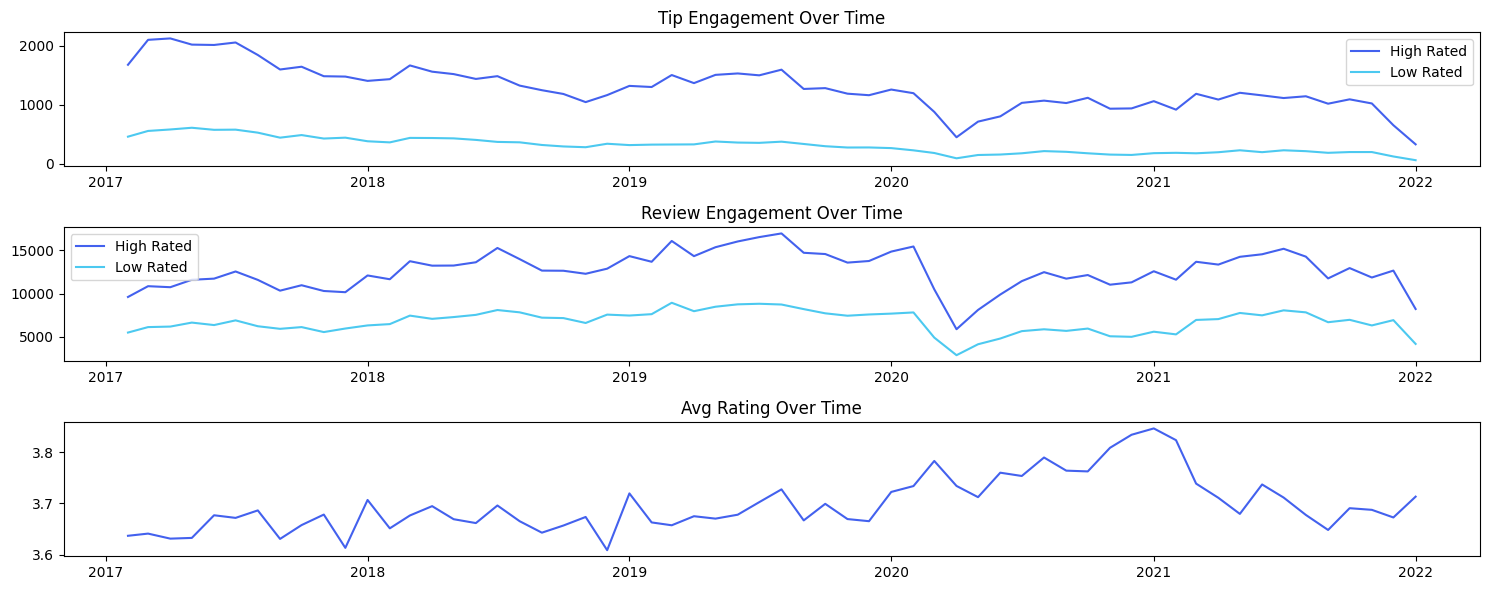

In [145]:
# plotting the line plots since we have the columns sorted by months and can be better understood on line graphs

plt.figure(figsize = (15, 6))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#4361ee')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#4cc9f0')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'High Rated', color = '#4361ee')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label = 'Low Rated', color = '#4cc9f0')
plt.legend()

plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#4361ee')
plt.tight_layout()
plt.show()

In [146]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
rating_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')                                 
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')

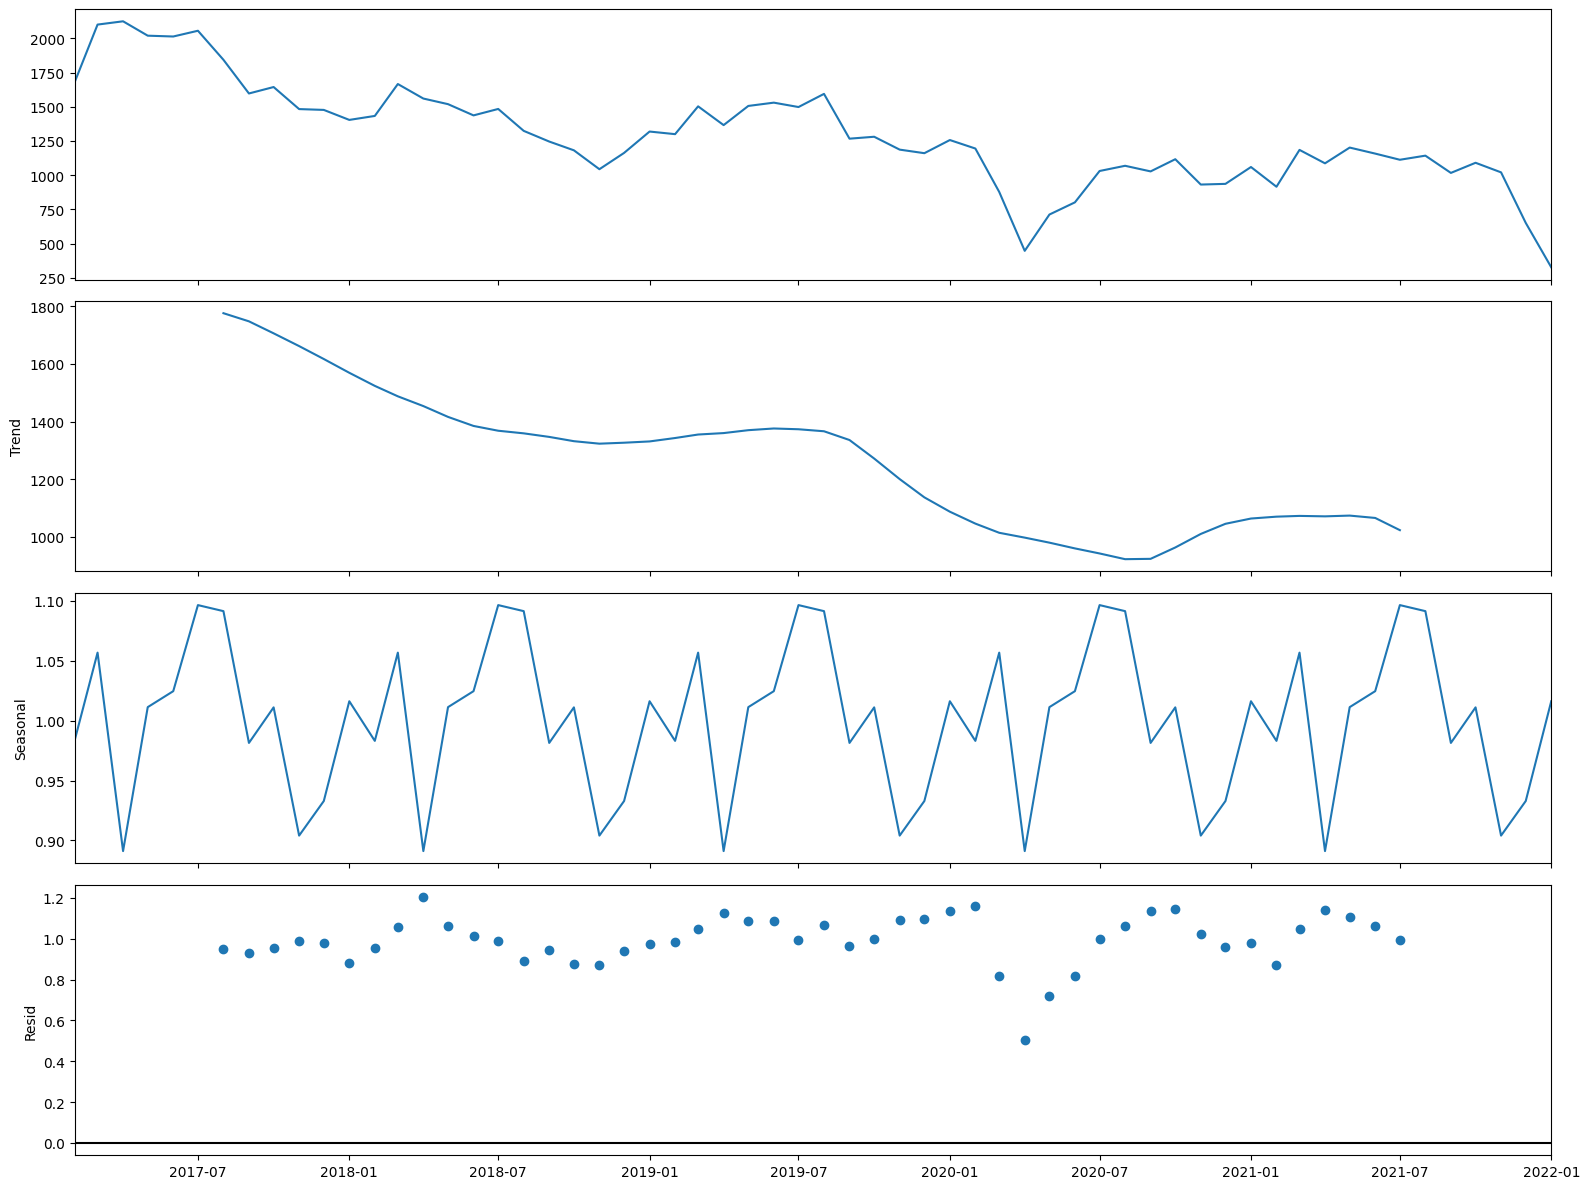

In [147]:
# Time series plots are used to check the response of values over time, to check its seasonalities, etc
# For this the index has to be set to time and the values for the plots have to be a spread over the time.

# This is a time-series plot for high-rated-tips

from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show()

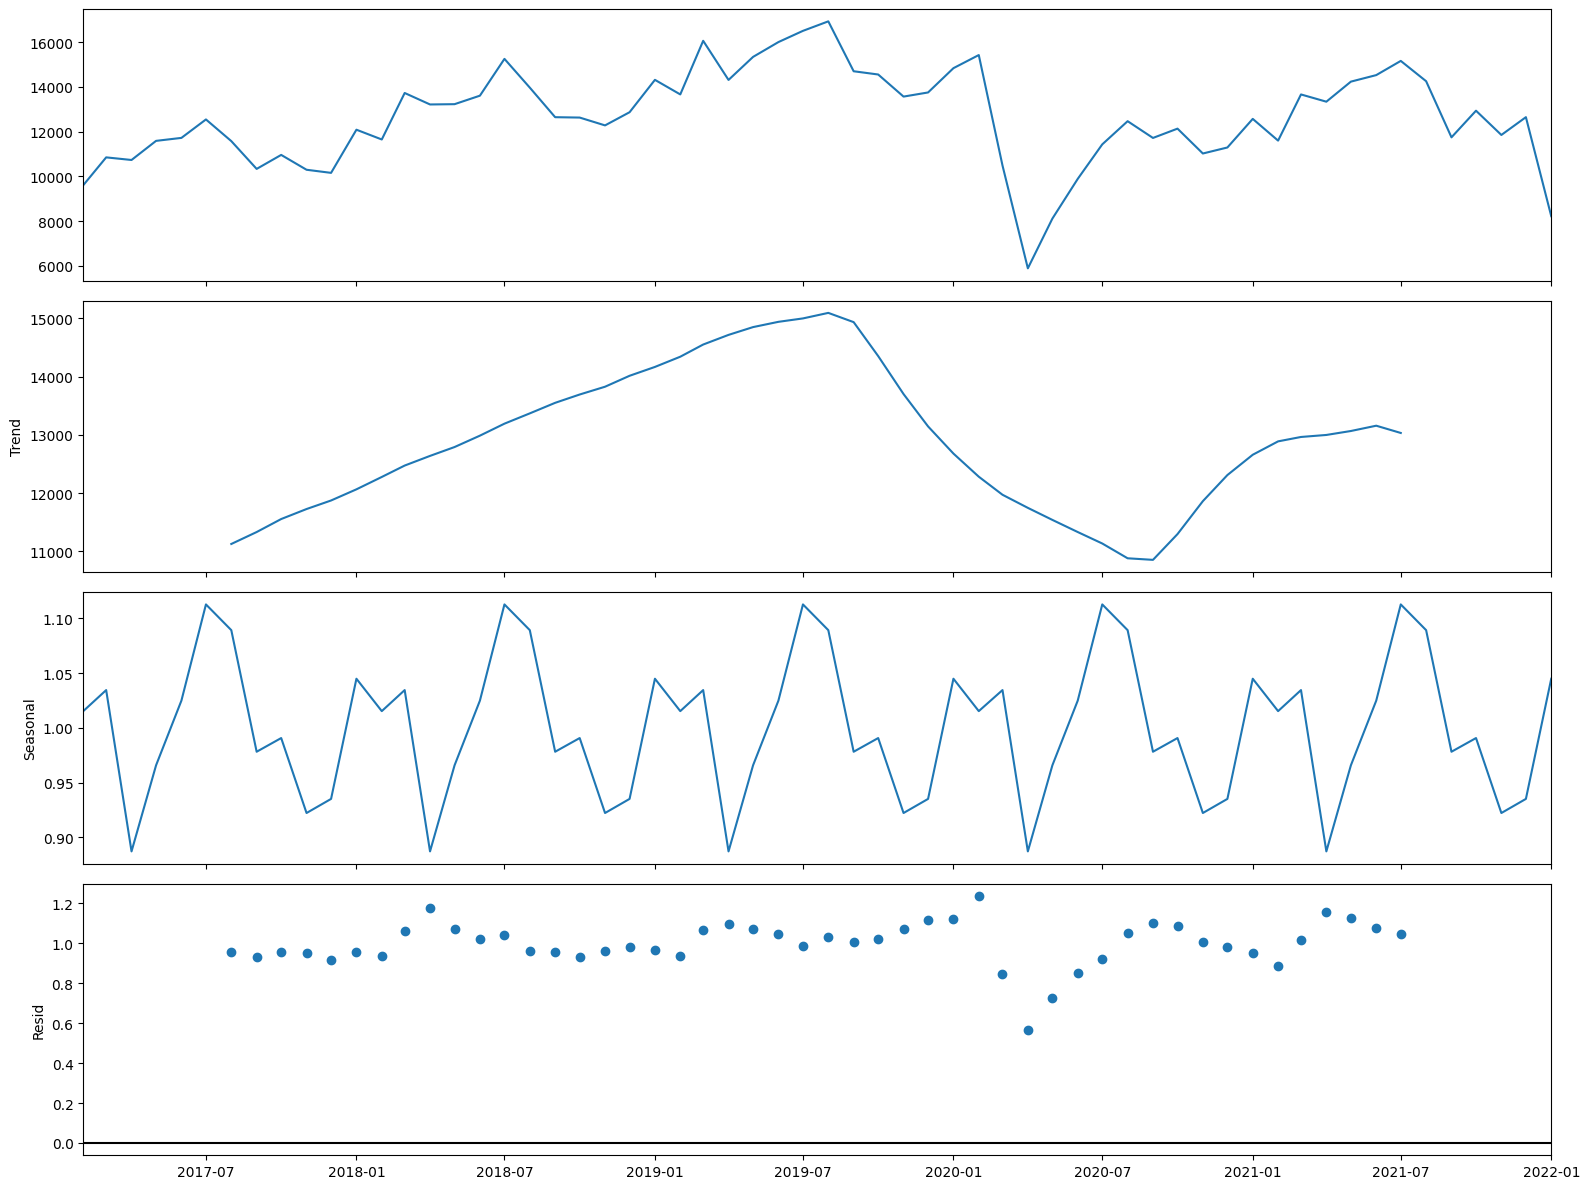

In [148]:
# This is a time-series plot for high-rated-ratings

from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(rating_high_rated, model='multiplicative', period = 12)

plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show()

In [153]:
# How does the sentiment of reviews and tips (useful, funny and cool) correlate with the success metrics of restaurants business?

sentiment_df = pd.read_sql_query(f"""SELECT b.business_id,
                                            AVG(b.stars) AS avg_rating, 
                                            SUM(b.review_count) AS review_count,
                                            SUM(s.useful_count) AS useful_count,
                                            SUM(s.funny_count) AS funny_count,
                                            SUM(s.cool_count) AS cool_count
                                     FROM
                                         (SELECT business_id,
                                                 SUM(useful) AS useful_count,
                                                 SUM(funny) AS funny_count,
                                                 SUM(cool) AS cool_count
                                          FROM
                                                  review
                                          GROUP BY business_id) AS s
                                     JOIN business AS b 
                                     ON b.business_id = s.business_id

                                     WHERE b.business_id IN {tuple(business_id['business_id'])}
                                     GROUP BY b.business_id
                                     ORDER BY review_count
                                   """, conn)

In [154]:
sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

In [157]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

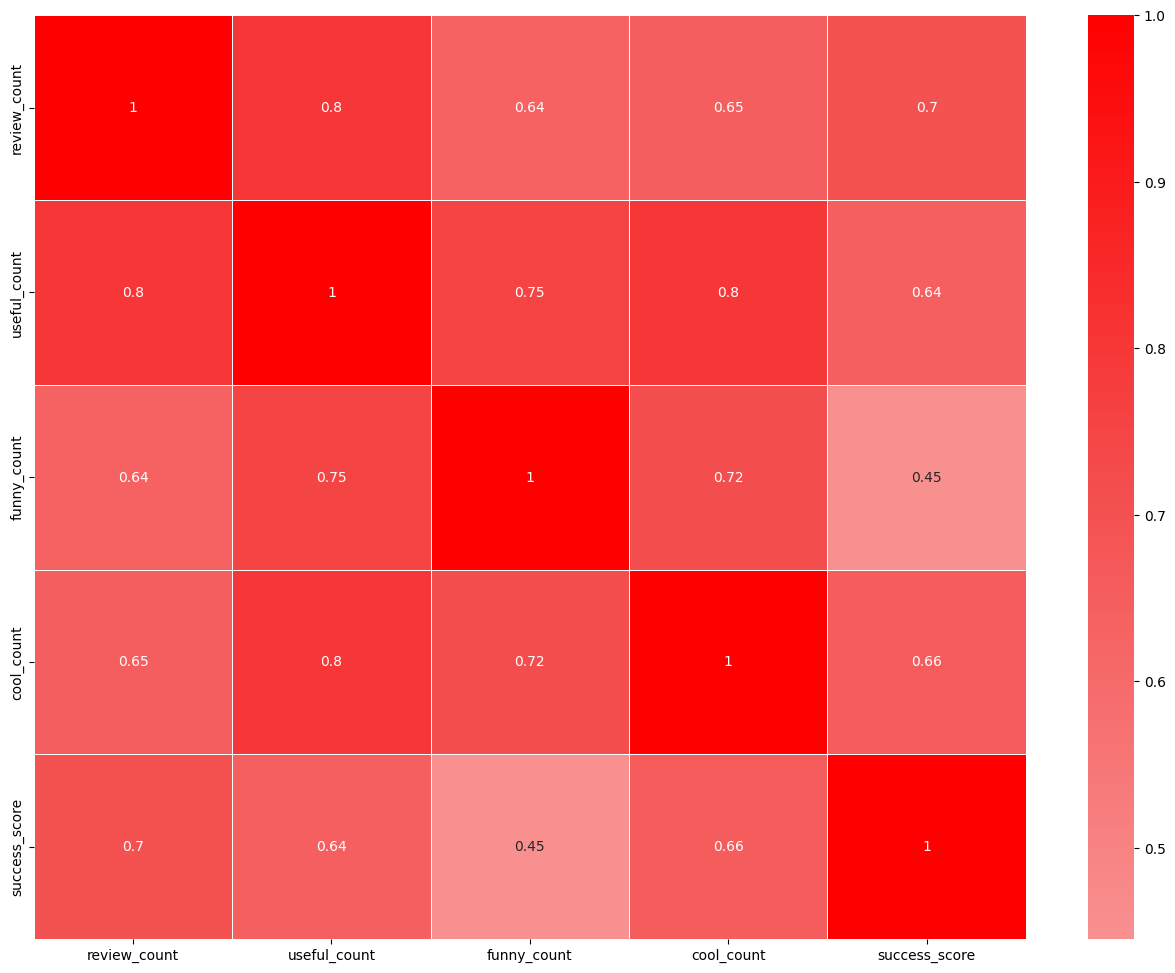

In [159]:
# PLot the heat-map to see the correlation between the scores

sns.heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidth=0.5, linecolor = 'white')
plt.show()

In [168]:
# Is there any realtion between the elite user and a non elite user ?

elite_df = pd.read_sql_query("""SELECT elite,
                            COUNT(*) AS row_count,
                            SUM(review_count) AS total_review_count
                     FROM
                         (SELECT
                             CASE
                                 WHEN elite = '' THEN 'Not Elite'
                                 ELSE 'Elite'
                             END AS elite,
                             u.review_count
                          FROM
                              user u) AS user_elite
                          GROUP BY
                          elite;
                   """, conn)

In [169]:
elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


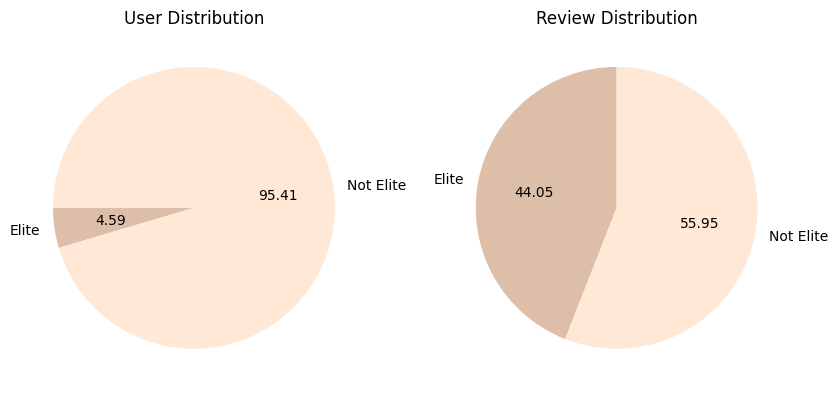

In [173]:
# plotting a Pie Chart of the Elite and Non Elite users

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['row_count'], labels = elite_df['elite'], autopct='%.2f', startangle=180, colors=['#ddbea9', '#ffe8d6'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels = elite_df['elite'], autopct='%.2f', startangle=90, colors=['#ddbea9', '#ffe8d6'])

plt.show()

In [179]:
# What are the busiest hours for restaurants as per user visit
#Extracts hour of a Day
#Calculating the review_count for that hour

review_engagement = pd.read_sql_query("""SELECT cast(strftime('%H', date) as integer) AS hour,   
                                                COUNT(*) AS review_count                         
                                         FROM review
                                         GROUP BY hour
                                      """, conn)

tip_engagement = pd.read_sql_query("""SELECT cast(strftime('%H', date) as integer) AS hour,
                                                COUNT(*) AS tip_count
                                         FROM tip
                                         GROUP BY hour
                                      """, conn)

checkin = pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])
# Above step iterates for date column in checkin table, and formats the date and time, later extracts only hours and uses them.    

checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()



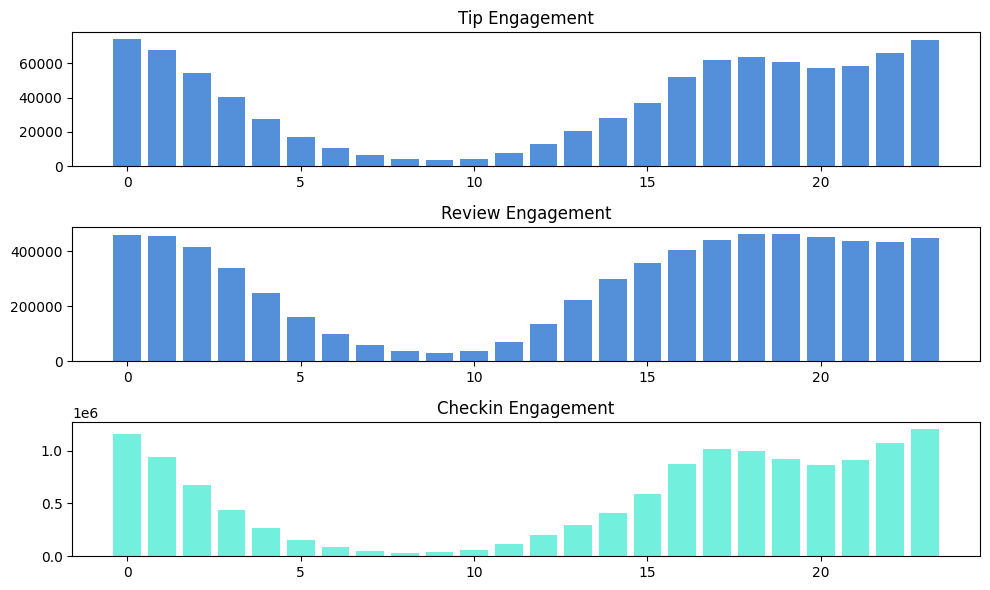

In [182]:
# Plotting the hourly customer engagement activities.

plt.figure(figsize = (10, 6))

plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color = '#5390d9')

plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(tip_engagement['hour'], review_engagement['review_count'], color = '#5390d9')

plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color = '#72efdd')

plt.tight_layout()
plt.show()